# Module Title:	 Strategic Thinking - Semester II
### Assessment Title: Capstone Project Semester II
### Lecturer Name:	 James Garza
### Student Full Name & Number:	Natalia de Oliveira Rodrigues 2023112

This academic project aims to delivery a critical analysis of the knowledge produced, in the course: Higher Diploma in Science in Data Analytics for Business at CCT College.

In [1]:
# pip install dtreeviz

In [2]:
# pip install yellowbrick

In [3]:
# conda install -c conda-forge imbalanced-learn

In [4]:
# pip install shap

In [5]:
# Importing required libraries.
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import asarray
import statistics as stats
import scipy.stats
from scipy.stats import skew
from scipy.stats import f_oneway
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
sns.set(color_codes=True)

from imblearn.over_sampling import SMOTE  
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import accuracy_score

import shap
shap.initjs()

from matplotlib.lines import Line2D
from sklearn.datasets import make_classification
from collections import Counter
import dtreeviz
from yellowbrick.model_selection import FeatureImportances

import warnings
warnings.filterwarnings('ignore')

# Data Dictionary:

Administrative: This is the number of administrative pages visited by the shoppers.

Administrative_Duration: This is the amount of time (in seconds) spent in this category of pages.

Informational: This is the number of informational pages visited by the shoppers.

Informational_Duration: This is the amount of time (in seconds) spent in this category of pages.

ProductRelated: This is the number of Product related pages visited by the shoppers.

ProductRelated_Duration: This is the amount of time (in seconds) spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. 

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase

# 3. Data Understanding

## 3.1 Exploratory Data Analysis (EDA)

In [6]:
# loading the data into dataframe.
df = pd.read_csv('../../data/online_shoppers_intention.csv')

In [7]:
df.shape
print('The dataset original shape: ', df.shape)

The dataset original shape:  (12330, 18)


In [8]:
df.isnull().values.any()

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [10]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [11]:
df.describe(include=object)

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [12]:
stat=df.describe()
stat.T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [13]:
# Target variable Imbalancing
df['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

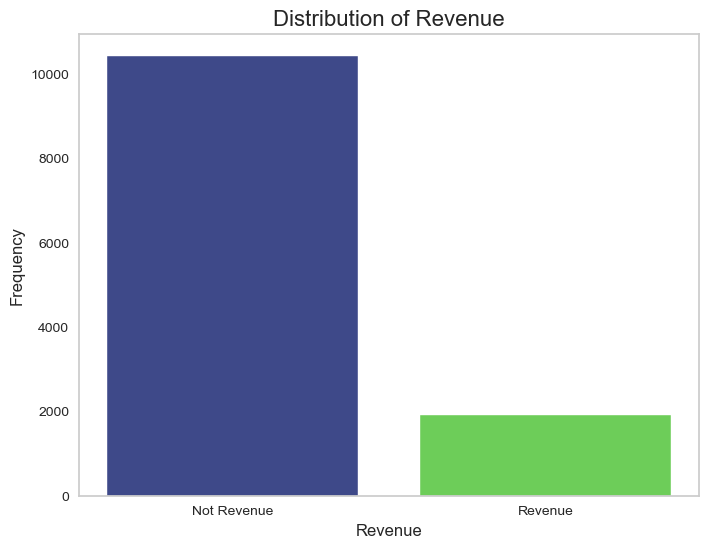

In [14]:
# Plot target variable
target = df.groupby('Revenue').size()

plt.figure(figsize=(8, 6)) 
plt.bar(target.index, target.values, color=['#3E4989', '#6DCD59'])  
plt.title('Distribution of Revenue', fontsize=16)  

plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(target.index, ['Not Revenue', 'Revenue'], rotation=0)  
plt.grid(False)  

plt.show()

In [15]:
first_df = df.rename(columns={"Administrative": "adm", "Administrative_Duration": "adm_dur",
                        "Informational":"inf","Informational_Duration":"inf_dur","ProductRelated":"prod_rel",
                        "ProductRelated_Duration":"prod_rel_dur","BounceRates":"bounces","ExitRates":"exit",
                        "PageValues":"pg_val","SpecialDay":"s_day","Month":"month","OperatingSystems":"os",
                        "Browser":"browser","Region":"reg","TrafficType":"traffic","VisitorType":"visitor",
                        "Weekend":"kend","Revenue":"rev"})

In [16]:
first_df.head()

,adm,adm_dur,inf,inf_dur,prod_rel,prod_rel_dur,bounces,exit,pg_val,s_day,month,os,browser,reg,traffic,visitor,kend,rev
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [17]:
first_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   adm           12330 non-null  int64  
 1   adm_dur       12330 non-null  float64
 2   inf           12330 non-null  int64  
 3   inf_dur       12330 non-null  float64
 4   prod_rel      12330 non-null  int64  
 5   prod_rel_dur  12330 non-null  float64
 6   bounces       12330 non-null  float64
 7   exit          12330 non-null  float64
 8   pg_val        12330 non-null  float64
 9   s_day         12330 non-null  float64
 10  month         12330 non-null  object 
 11  os            12330 non-null  int64  
 12  browser       12330 non-null  int64  
 13  reg           12330 non-null  int64  
 14  traffic       12330 non-null  int64  
 15  visitor       12330 non-null  object 
 16  kend          12330 non-null  bool   
 17  rev           12330 non-null  bool   
dtypes: bool(2), float64(7), in

## 3.2 Data Visualization

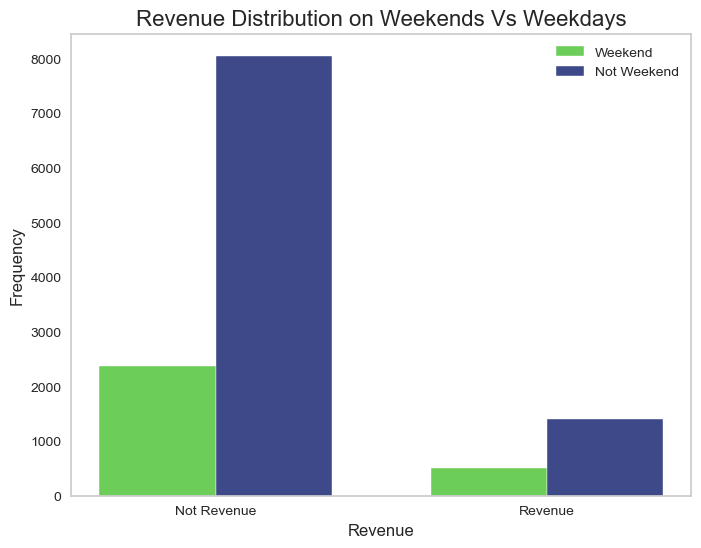

In [18]:
# Plot Revenue Distribution on Weekends Vs Weekdays
grouped_data = df.groupby(['Revenue','Weekend']).size().unstack()

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(grouped_data.index))

plt.bar(index, grouped_data[True], bar_width, label='Weekend', color='#6DCD59')
plt.bar(index + bar_width, grouped_data[False], bar_width, label='Not Weekend', color='#3E4989')

plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Revenue Distribution on Weekends Vs Weekdays', fontsize=16)
plt.xticks(index + bar_width / 2, ['Not Revenue', 'Revenue'])

plt.grid(False)
plt.legend()
plt.show()

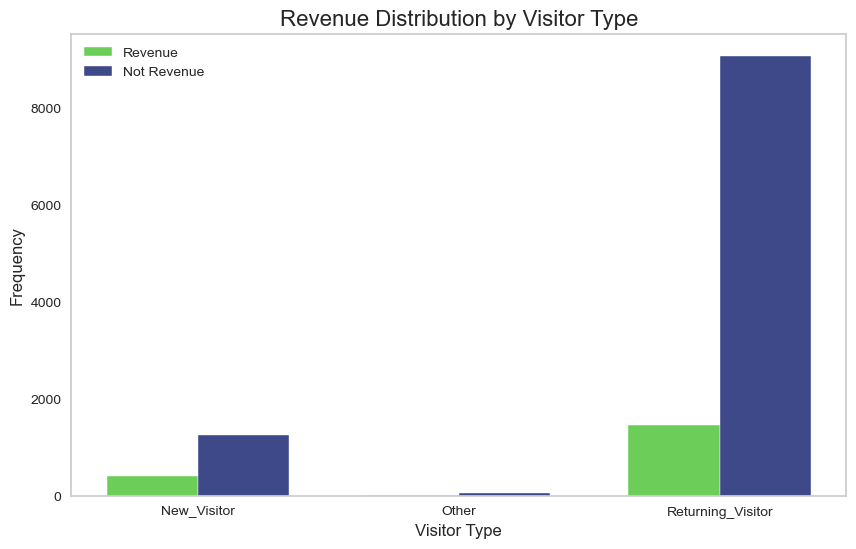

In [19]:
# Plot Revenue Distribution by Visitor Type
visitor_grouped_data = df.groupby(['VisitorType', 'Revenue']).size().unstack()

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(visitor_grouped_data.index))

plt.bar(index, visitor_grouped_data[True], bar_width, label='Revenue', color='#6DCD59')
plt.bar(index + bar_width, visitor_grouped_data[False], bar_width, label='Not Revenue', color='#3E4989')

plt.xlabel('Visitor Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Revenue Distribution by Visitor Type', fontsize=16)
plt.xticks(index + bar_width / 2, visitor_grouped_data.index)

plt.grid(False)
plt.legend()
plt.show()

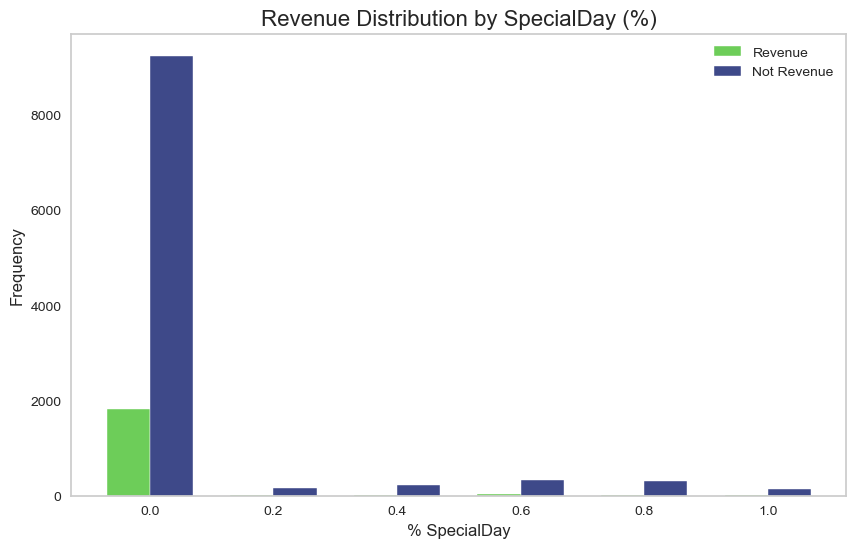

In [20]:
# Plot Revenue Distribution by Visitor Type
visitor_grouped_data = df.groupby(['SpecialDay', 'Revenue']).size().unstack()

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(visitor_grouped_data.index))

plt.bar(index, visitor_grouped_data[True], bar_width, label='Revenue', color='#6DCD59')
plt.bar(index + bar_width, visitor_grouped_data[False], bar_width, label='Not Revenue', color='#3E4989')

plt.xlabel('% SpecialDay', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Revenue Distribution by SpecialDay (%)', fontsize=16)
plt.xticks(index + bar_width / 2, visitor_grouped_data.index)

plt.grid(False)
plt.legend()
plt.show()

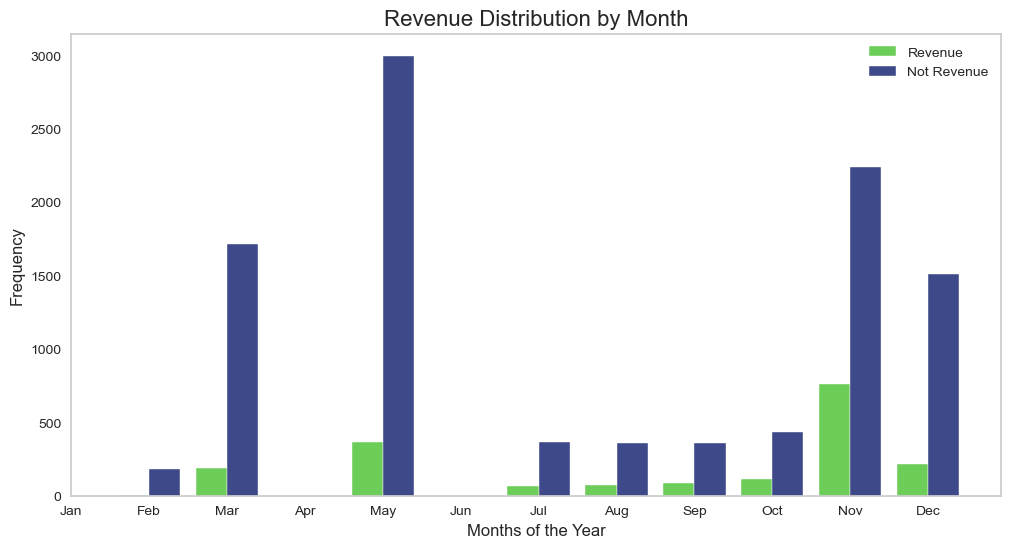

In [21]:
# Order bars per months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot Revenue Distribution by Month
revenue_by_month = df.groupby(['Month', 'Revenue']).size().unstack().reindex(month_order)
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = np.arange(len(revenue_by_month.index))

plt.bar(index, revenue_by_month[True], bar_width, label='Revenue', color='#6DCD59')
plt.bar(index + bar_width, revenue_by_month[False], bar_width, label='Not Revenue', color='#3E4989')

plt.xlabel('Months of the Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Revenue Distribution by Month', fontsize=16)
plt.xticks(index + bar_width / 2, revenue_by_month.index)

plt.grid(False)
plt.legend()
plt.show()

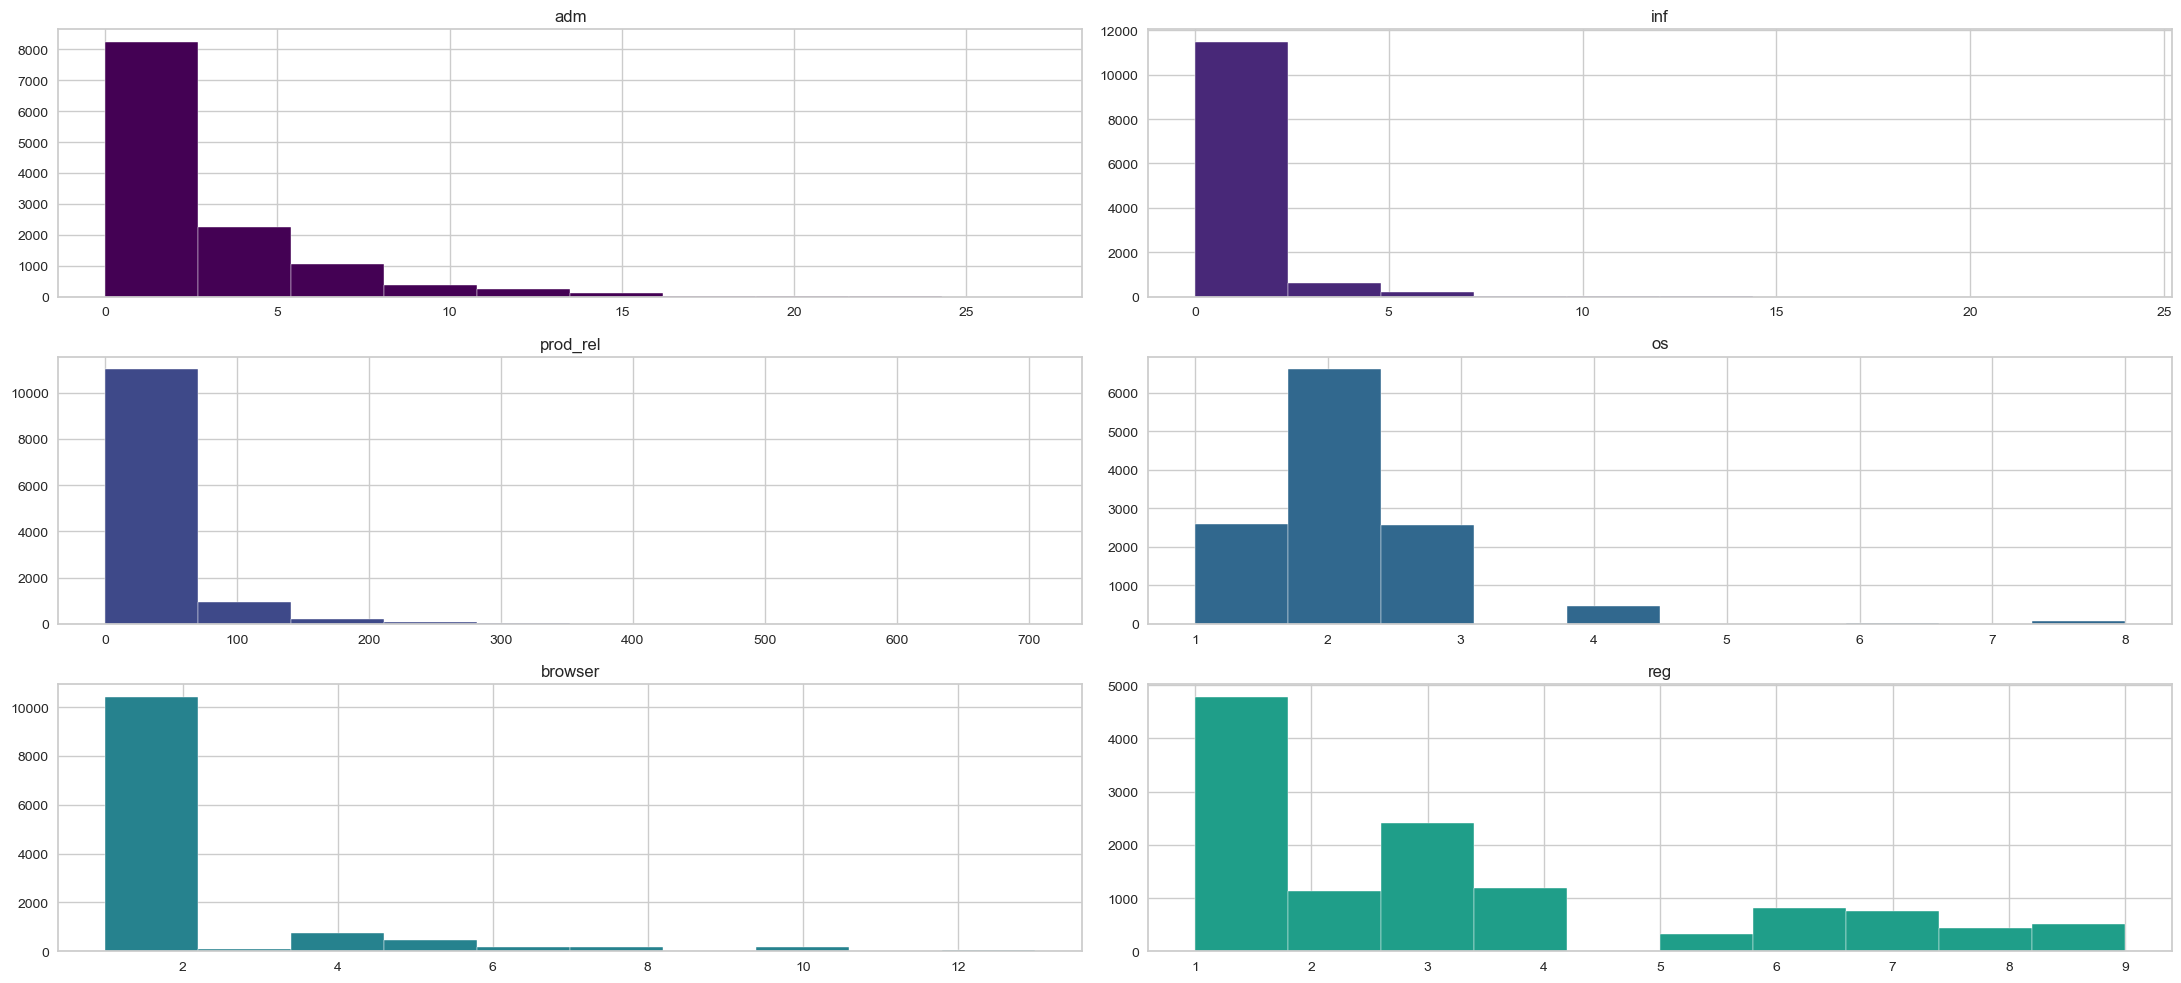

In [22]:
custom_colors = ['#440154', '#482878', '#3E4989', '#31688E', '#26828E', '#1F9E89', '#35B779', '#6DCD59', '#B4DD2C', '#FDE725']

# Plot the distribution of numerical attributes 
ax = first_df.hist(['adm', 'inf', 'prod_rel', 'os', 'browser', 'reg'], figsize=(22, 10), grid=True)

for a, color in zip(ax.flatten(), custom_colors):
    for patch in a.patches:
        patch.set_facecolor(color)  

plt.tight_layout()
plt.show()

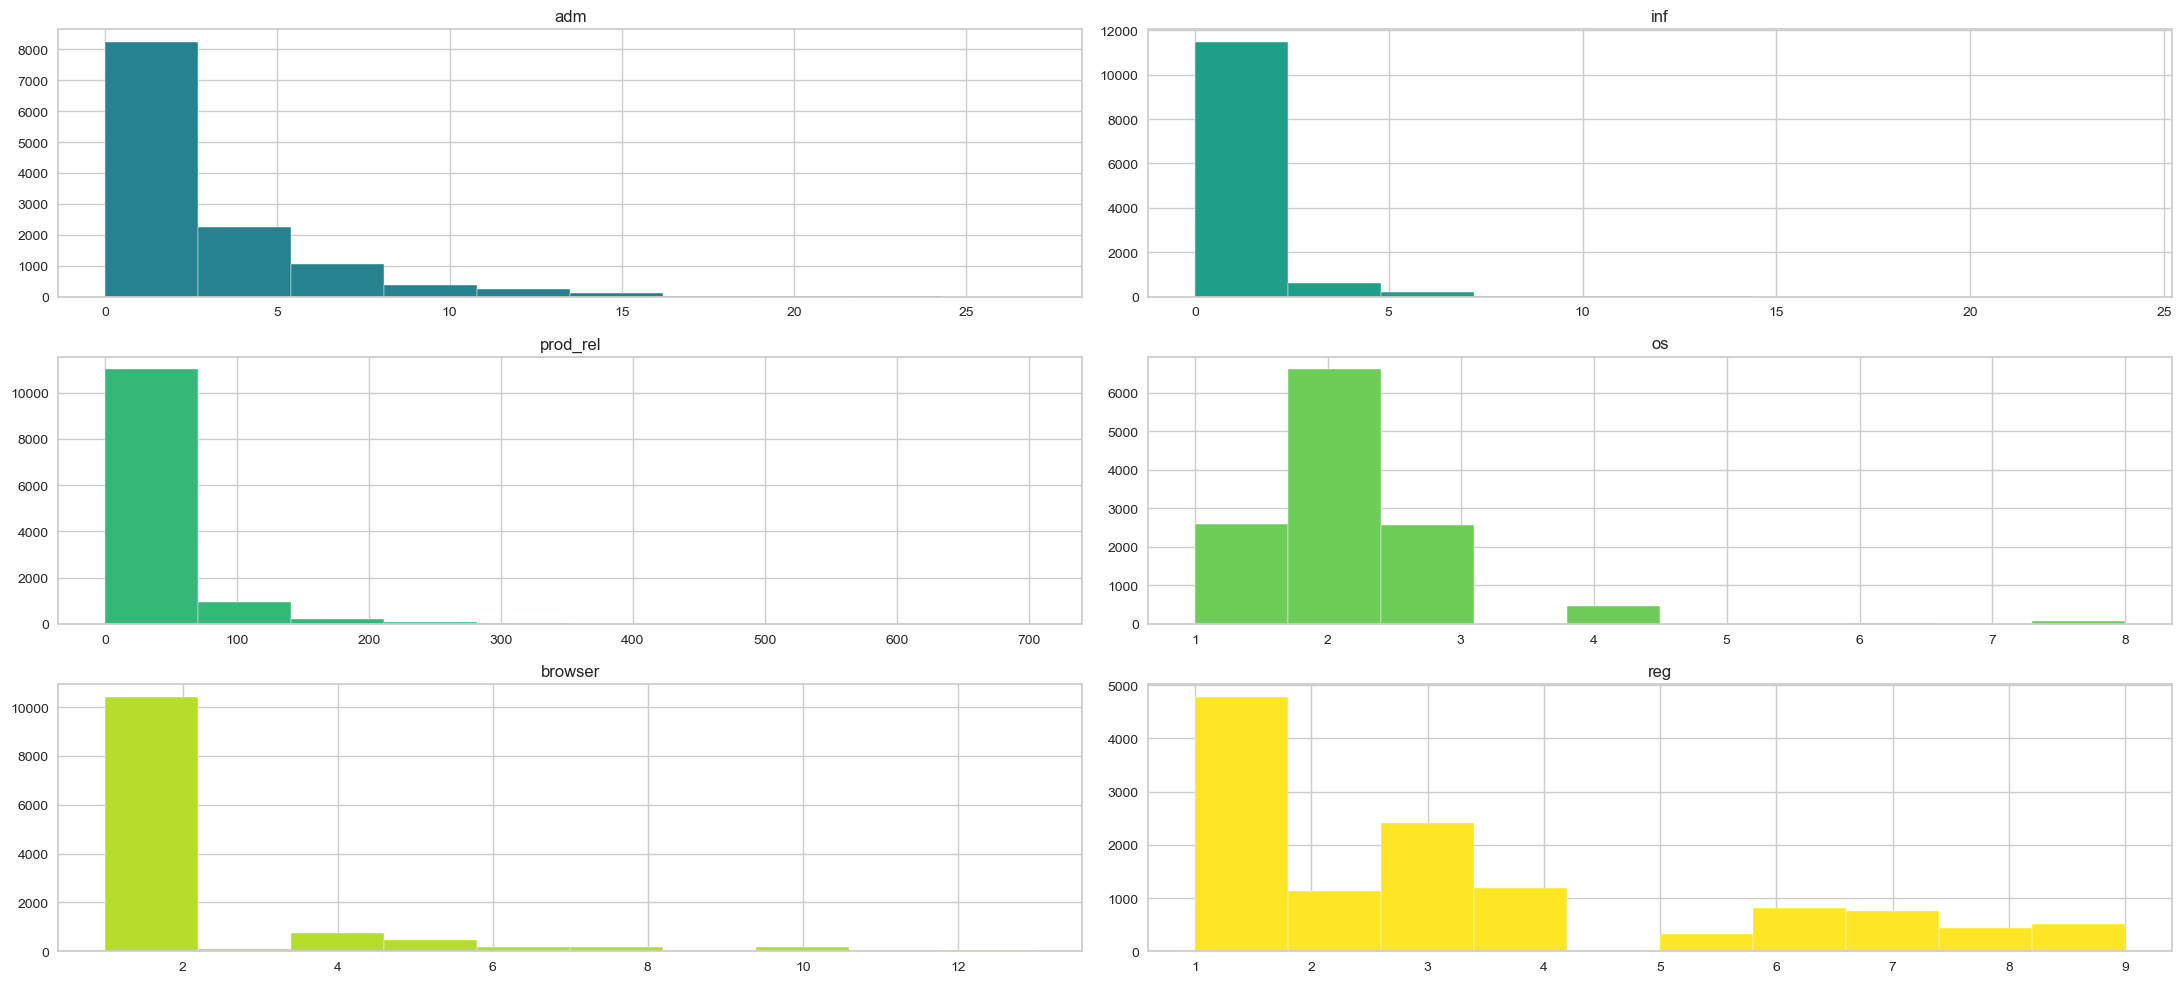

In [23]:
custom_colors = ['#26828E', '#1F9E89', '#35B779', '#6DCD59', '#B4DD2C', '#FDE725']

# Plot the distribution of numerical attributes
ax = first_df.hist(['adm', 'inf', 'prod_rel', 'os', 'browser', 'reg'], figsize=(22, 10), grid=True)

# Accessing individual axes to set colors
for a, color in zip(ax.flatten(), custom_colors):
    for patch in a.patches:
        patch.set_facecolor(color)  

plt.tight_layout()
plt.show()

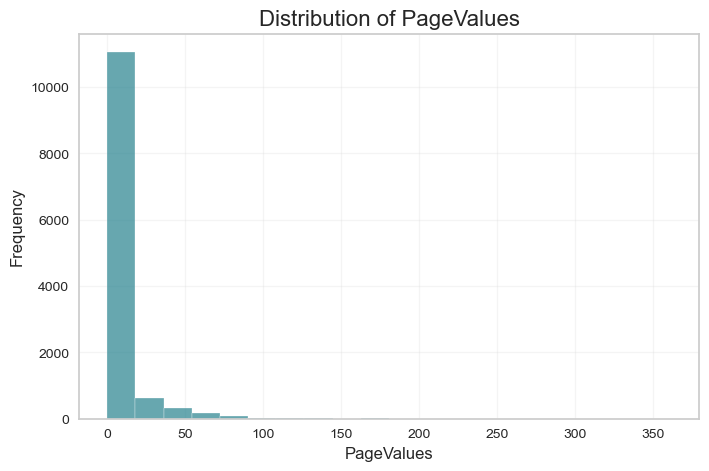

In [24]:
# Plot the distribution of 'PageValues' column
plt.figure(figsize=(8, 5))
plt.hist(first_df['pg_val'], bins=20, alpha=0.7, color='#26828E')
plt.title('Distribution of PageValues', fontsize=16)
plt.xlabel('PageValues', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.2)

plt.show()

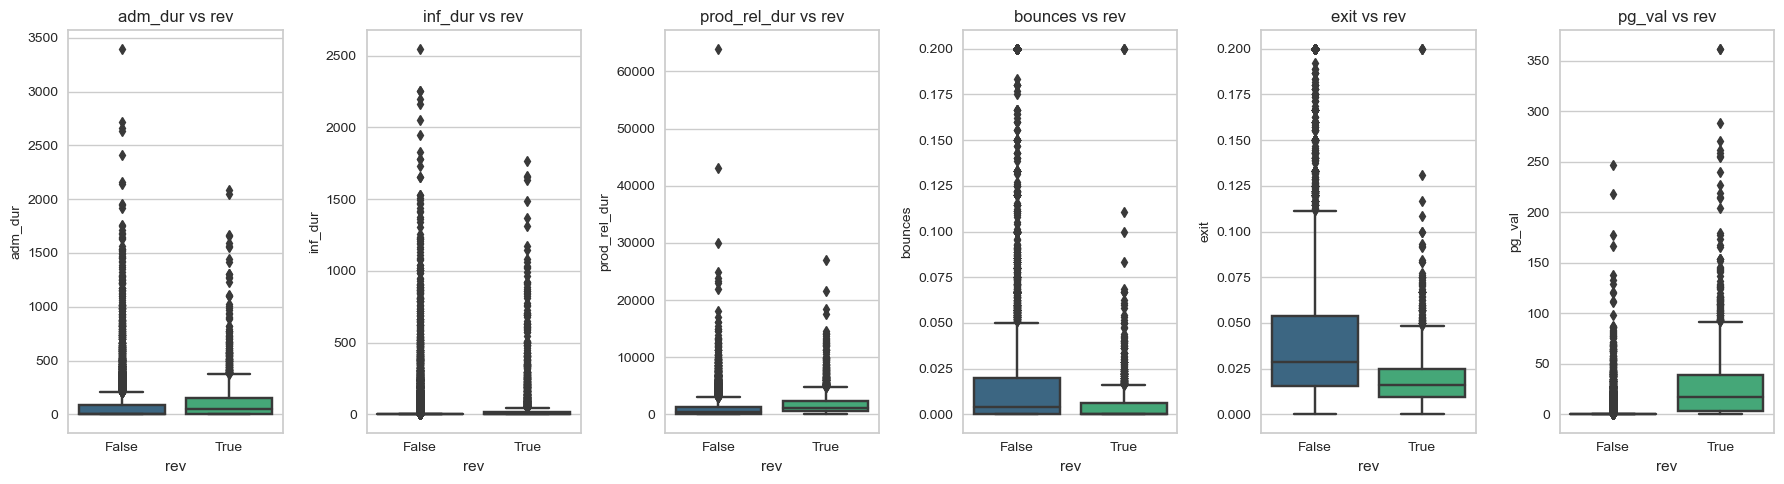

In [25]:
continuousColsList = ['adm_dur', 'inf_dur', 'prod_rel_dur', 'bounces', 'exit', 'pg_val']
viridis_palette = sns.color_palette("viridis", 2)  

fig, PlotCanvas = plt.subplots(nrows=1, ncols=len(continuousColsList), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "Revenue"
for PredictorCol, i in zip(continuousColsList, range(len(continuousColsList))):
    sns.boxplot(x='rev', y=PredictorCol, data=first_df, ax=PlotCanvas[i], palette=viridis_palette)
    PlotCanvas[i].set_title(f'{PredictorCol} vs rev', fontsize=12)
    PlotCanvas[i].set_ylabel(PredictorCol, fontsize=10)

plt.tight_layout()
plt.show()

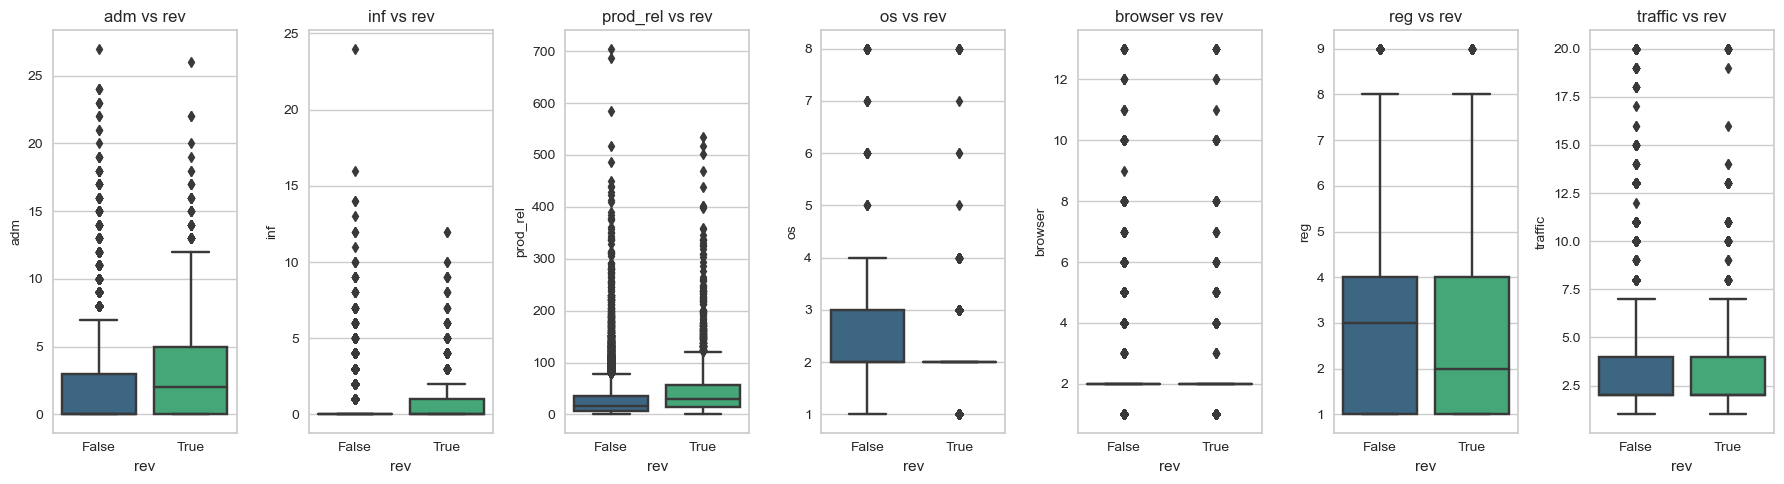

In [26]:
continuousColsList = ['adm', 'inf', 'prod_rel', 'os', 'browser', 'reg', 'traffic']
viridis_palette = sns.color_palette("viridis", 2)  

fig, PlotCanvas = plt.subplots(nrows=1, ncols=len(continuousColsList), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "Revenue"
for PredictorCol, i in zip(continuousColsList, range(len(continuousColsList))):
    sns.boxplot(x='rev', y=PredictorCol, data=first_df, ax=PlotCanvas[i], palette=viridis_palette)
    PlotCanvas[i].set_title(f'{PredictorCol} vs rev', fontsize=12)
    PlotCanvas[i].set_ylabel(PredictorCol, fontsize=10)

plt.tight_layout()
plt.show()

## 3.3 Data Pre-processing

In [27]:
# Checking unique values by attribute non numerical
first_df['rev'].unique(), first_df["kend"].unique(), first_df["visitor"].unique(), first_df["month"].unique(),

(array([False,  True]),
 array([False,  True]),
 array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object),
 array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
        'Dec'], dtype=object))

In [28]:
# Transform boolean columns into integers
first_df[['rev', 'kend']] = first_df[['rev', 'kend']].astype(int)

In [29]:
# Define a mapping for month abbreviations to numerical values
month_mapping = {'Feb': 2, 'Mar': 3, 'May': 5, 'Oct': 10, 'June': 6, 'Jul': 7, 'Aug': 8, 'Nov': 11, 'Sep': 9, 'Dec': 12}

# Use the map function to replace values in the 'month' column
first_df['month'] = first_df['month'].replace(month_mapping, inplace=False)

In [30]:
# Define a mapping for 'visitor' values to numerical values
visitor_mapping = {'Returning_Visitor': 0, 'New_Visitor': 1, 'Other': 2}

# Use the replace function with the mapping dictionary
first_df['visitor'] = first_df['visitor'].replace(visitor_mapping, inplace=False)

In [31]:
# Calculate IQR per attribute
Q1 = first_df.quantile(0.25)
Q3 = first_df.quantile(0.75)
IQR = Q3-Q1
#IQR.sort_values(ascending=False)

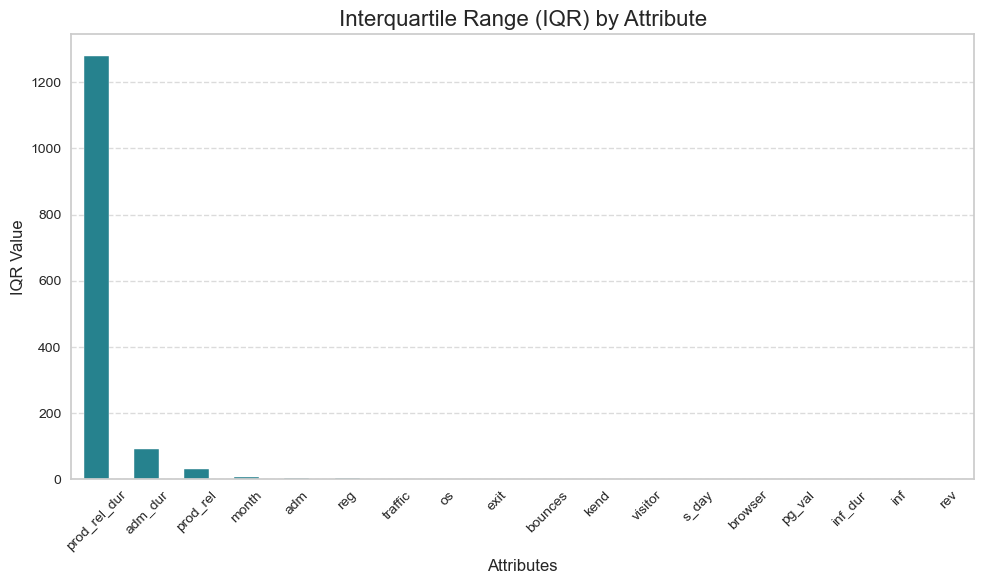

In [32]:
# Plot the IQR values#
plt.figure(figsize=(10, 6))  
IQR.sort_values(ascending=False).plot(kind="bar", color='#26828E') 

plt.title("Interquartile Range (IQR) by Attribute", fontsize=16)  
plt.xlabel("Attributes", fontsize=12)  
plt.ylabel("IQR Value", fontsize=12)  
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.grid(axis='x', linestyle=' ')

plt.tight_layout()
plt.show()

In [33]:
# Get the skewness by attribute
skew_df = first_df.skew()


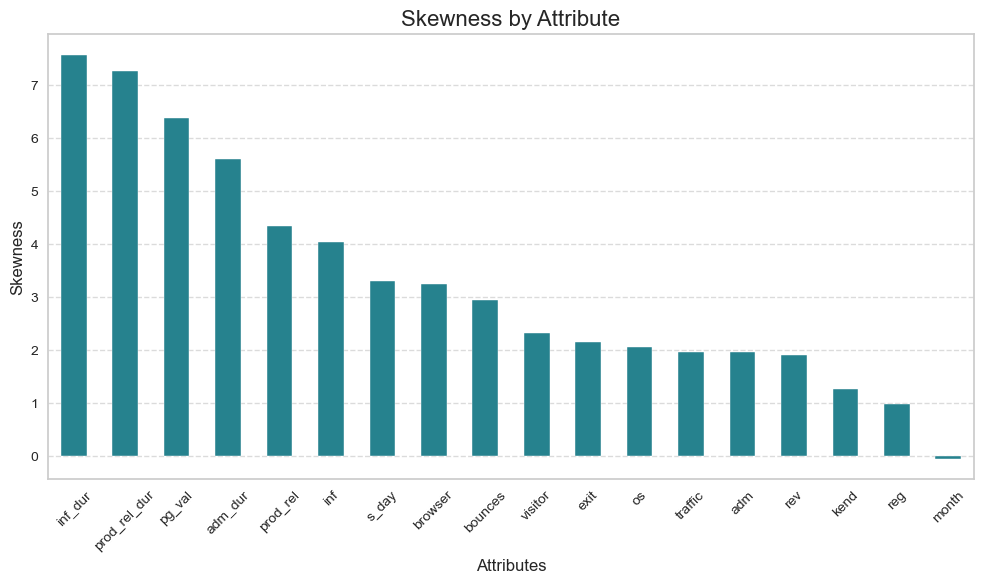

In [34]:
# Plot the skewness values
plt.figure(figsize=(10, 6)) 
skew_df.sort_values(ascending=False).plot(kind="bar", color='#26828E')  

plt.title("Skewness by Attribute", fontsize=16)  
plt.xlabel("Attributes", fontsize=12) 
plt.ylabel("Skewness", fontsize=12)  
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.grid(axis='x', linestyle=' ')

plt.tight_layout()
plt.show()

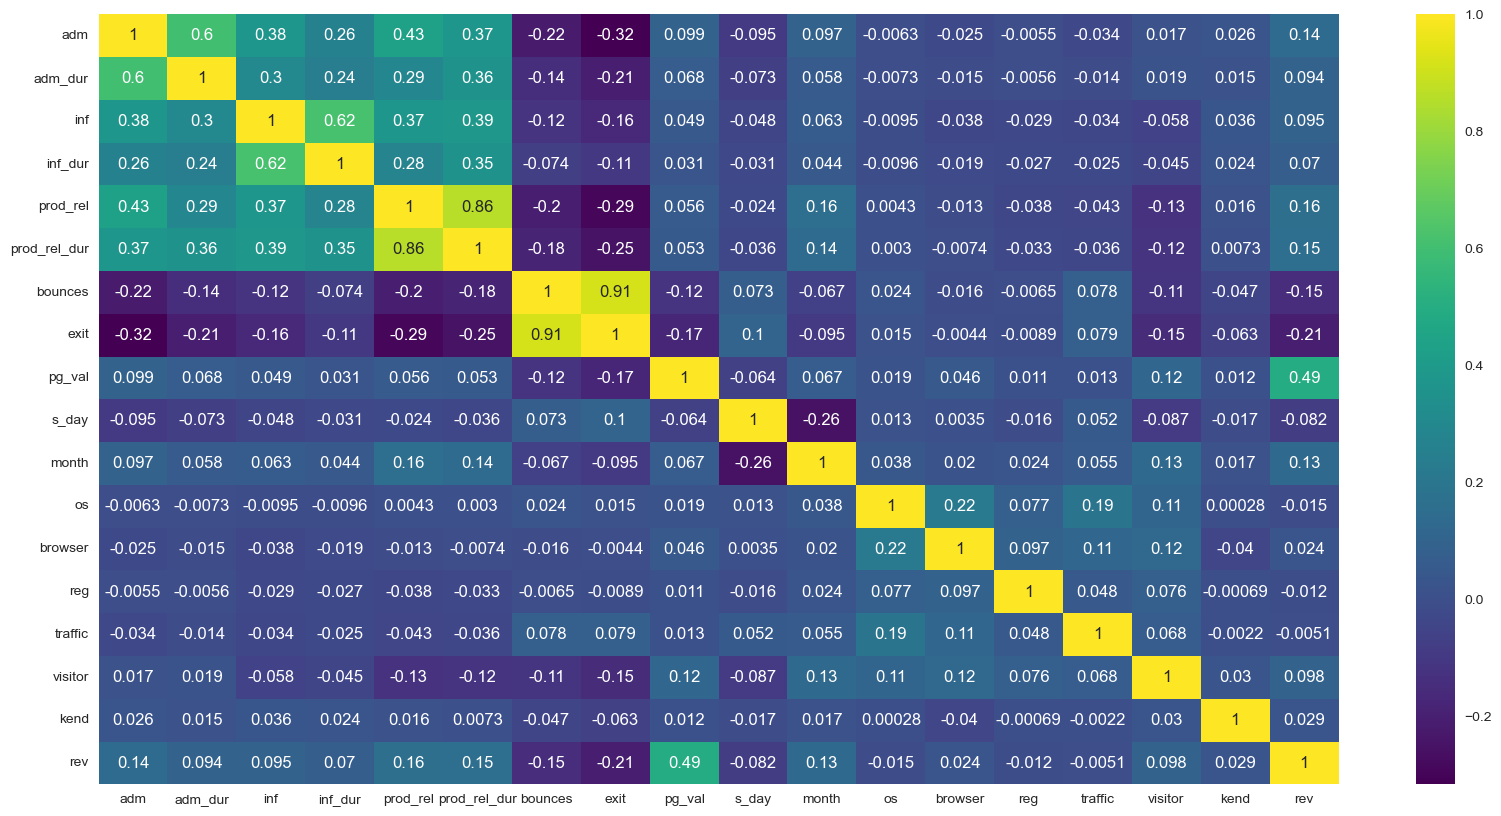

In [35]:
# Plot Correlation Matrix
plt.figure(figsize=(20,10))
c = first_df.corr()
sns.heatmap(c,cmap="viridis",annot=True);

## 3.4 Cluster Analysis: 

### Bounce Rates, Exit Rates, Page Engagement, and Revenue Insights

In [36]:
# Create different dataframe to apply clustering data preparation
cluster_df = first_df.copy()

In [37]:
# Check new columns
cluster_df.head()

,adm,adm_dur,inf,inf_dur,prod_rel,prod_rel_dur,bounces,exit,pg_val,s_day,month,os,browser,reg,traffic,visitor,kend,rev
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,1,0


In [38]:
# Create new column with the total number of pages visited
cluster_df['pages_visited_sum'] = cluster_df[['adm', 'inf', 'prod_rel']].sum(axis=1)
# Create new column with the total of duration spent by shoppers
cluster_df['duration_sum'] = cluster_df[['adm_dur', 'inf_dur', 'prod_rel_dur']].sum(axis=1)
# Transform the column created before from minutes to hours for clarity
cluster_df['duration_sum'] /= 60
# Transform values in percentage for clarity
cluster_df[['exit','bounces']] *= 100
# Handle outliers 
cluster_df['duration_sum'] = np.where(cluster_df['duration_sum'] > 300, 300, cluster_df['duration_sum'])

In [39]:
# check transformations
cluster_df.tail()

,adm,adm_dur,inf,inf_dur,prod_rel,prod_rel_dur,bounces,exit,pg_val,s_day,month,os,browser,reg,traffic,visitor,kend,rev,pages_visited_sum,duration_sum
12325,3,145.0,0,0.0,53,1783.791667,0.714286,2.903061,12.241717,0.0,12,4,6,1,1,0,1,0,56,32.146528
12326,0,0.0,0,0.0,5,465.750000,0.000000,2.133333,0.000000,0.0,11,3,2,1,8,0,1,0,5,7.762500
12327,0,0.0,0,0.0,6,184.250000,8.333333,8.666667,0.000000,0.0,11,3,2,1,13,0,1,0,6,3.070833
12328,4,75.0,0,0.0,15,346.000000,0.000000,2.105263,0.000000,0.0,11,2,2,3,11,0,0,0,19,7.016667
12329,0,0.0,0,0.0,3,21.250000,0.000000,6.666667,0.000000,0.0,11,3,2,1,2,1,1,0,3,0.354167


In [40]:
# Select relevant columns for clustering
columns_for_clustering = ['pages_visited_sum', 'duration_sum','bounces','exit']
X = cluster_df[columns_for_clustering]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

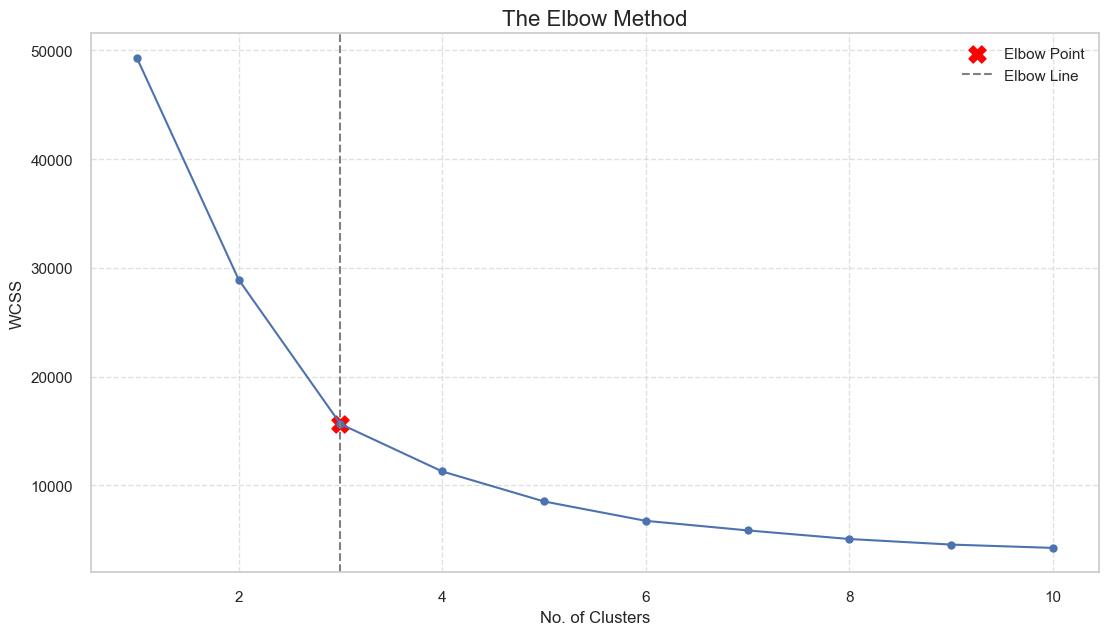

In [41]:
# Apply the Elbow Method
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0, algorithm='full', tol=0.001)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

# Find the elbow point
elbow_point = 3  
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.scatter(elbow_point, wcss[elbow_point - 1], c='red', label='Elbow Point', s=150, marker='X')
plt.axvline(x=elbow_point, color='gray', linestyle='--', linewidth=1.5, label='Elbow Line')
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('The Elbow Method', fontsize=16)
plt.xlabel('No. of Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.legend()
plt.show()

In [42]:
# Number of clusters base on the Elbow Method result
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=38, init='k-means++', n_init=50, algorithm='elkan')
cluster_df['cluster'] = kmeans.fit_predict(X_scaled)

cluster_df['cluster'].value_counts()

cluster
0    10328
1     1030
2      972
Name: count, dtype: int64

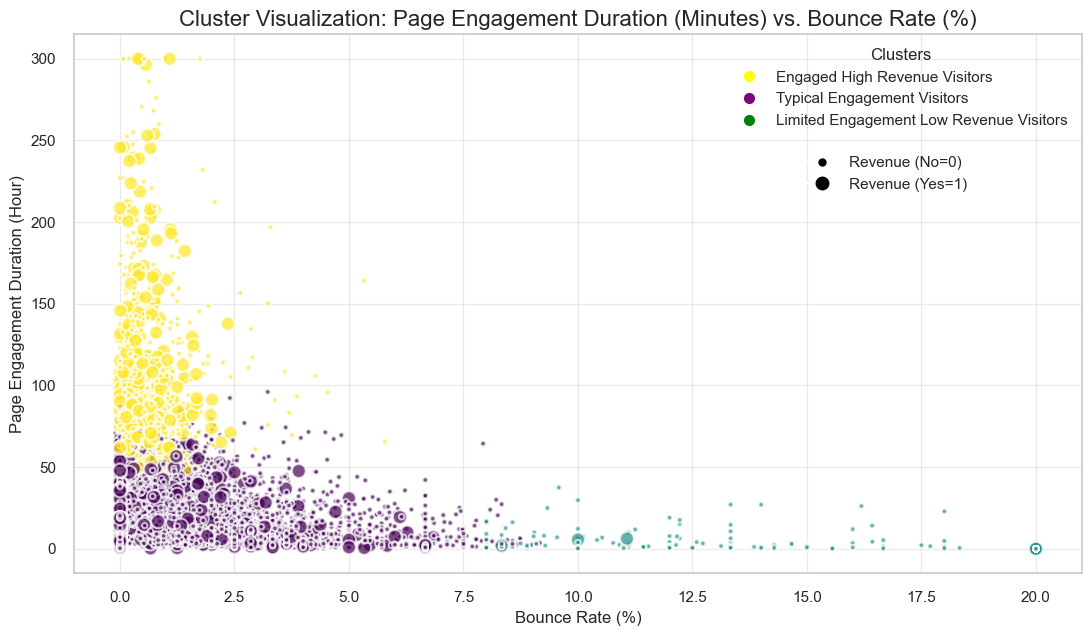

In [43]:
# Define clusters' names
cluster_names = ['Engaged High Revenue Visitors', 
                 'Typical Engagement Visitors', 
                 'Limited Engagement Low Revenue Visitors']

# Visualize Clusters
scatter = sns.scatterplot(x='bounces', y='duration_sum', hue='cluster', hue_order=cluster_names,
               size='rev', sizes=(100, 15), palette='viridis', edgecolors='black', linewidth=1.5, data=cluster_df, alpha=0.7)

plt.title('Cluster Visualization: Page Engagement Duration (Minutes) vs. Bounce Rate (%)', fontsize=16)
plt.xlabel('Bounce Rate (%)', fontsize=12)
plt.ylabel('Page Engagement Duration (Hour)', fontsize=12)


# Set both legends
legend_labels_hue = {f'Cluster {i}': name for i, name in enumerate(cluster_names, start=1)}
handles_hue, _ = scatter.get_legend_handles_labels()

legend_hue = plt.legend([Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=8),
                         Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=8),
                         Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8)],
                        legend_labels_hue.values(), title='Clusters', loc='upper right')

handles_size = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=6),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10),
]  
legend_size = plt.legend(handles_size, ['Revenue (No=0)', 'Revenue (Yes=1)'], loc='upper right', 
                         bbox_to_anchor=(0.9, 0.8))
# Plot visualization
plt.gca().add_artist(legend_hue)
plt.grid(alpha=0.4)
plt.show()

In [44]:
# Print a few examples from each cluster
cluster_centers = kmeans.cluster_centers_

for i in range(num_clusters):
    cluster_samples = cluster_df[cluster_df['cluster'] == i].sample(5)  
    print(f"\nExamples from Cluster{i}:")
    print(cluster_samples[columns_for_clustering])


Examples from Cluster0:
      pages_visited_sum  duration_sum  bounces       exit
7882                  4      0.550000      0.0   3.333333
9339                 20      3.259167      0.0   1.851852
4271                 22      8.344444      0.0   0.952381
6867                  2      1.073333      0.0  10.000000
6470                  4      1.643333      0.0   5.000000

Examples from Cluster1:
       pages_visited_sum  duration_sum    bounces      exit
4163                   1      0.000000  20.000000  20.00000
1265                   1      0.000000  20.000000  20.00000
2688                   1      0.000000  20.000000  20.00000
8461                   3     37.521333   9.583333  13.74269
11963                  2      0.233333  10.000000  15.00000

Examples from Cluster2:
       pages_visited_sum  duration_sum   bounces      exit
8976                  81     74.259484  0.600000  1.453968
4664                 158     71.303849  1.708861  3.312236
6836                  87     83.658310  

# 4. Data Preparation

## 4.1 Data Engineering

In [45]:
# Display unique values per attribute
first_df.nunique().sort_values(ascending=False)

prod_rel_dur    9551
exit            4777
adm_dur         3335
pg_val          2704
bounces         1872
inf_dur         1258
prod_rel         311
adm               27
traffic           20
inf               17
browser           13
month             10
reg                9
os                 8
s_day              6
visitor            3
kend               2
rev                2
dtype: int64

In [46]:
# Create dict without target variable
table_counts = first_df.drop('rev', axis=1).nunique().to_dict()
table_counts

{'adm': 27,
 'adm_dur': 3335,
 'inf': 17,
 'inf_dur': 1258,
 'prod_rel': 311,
 'prod_rel_dur': 9551,
 'bounces': 1872,
 'exit': 4777,
 'pg_val': 2704,
 's_day': 6,
 'month': 10,
 'os': 8,
 'browser': 13,
 'reg': 9,
 'traffic': 20,
 'visitor': 3,
 'kend': 2}

In [47]:
# Create lists based on counts per attribute 
categorical_list = [item for item, count in table_counts.items() if count < 30]
numerical_list = [item for item, count in table_counts.items() if count >= 30]

# Print lists 
print("Categorical:", categorical_list)
print("Numerical:", numerical_list)

Categorical: ['adm', 'inf', 's_day', 'month', 'os', 'browser', 'reg', 'traffic', 'visitor', 'kend']
Numerical: ['adm_dur', 'inf_dur', 'prod_rel', 'prod_rel_dur', 'bounces', 'exit', 'pg_val']


In [48]:
# Define a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    return(SelectedPredictors)

In [49]:
# Call the function to check which categorical variables are correlated with target
continuousVariables = categorical_list
FunctionAnova(first_df, 'rev', continuousVariables )

##### ANOVA Results ##### 

adm is correlated with rev | P-Value: 3.519759837717179e-54
inf is correlated with rev | P-Value: 3.1740343112109894e-26
s_day is correlated with rev | P-Value: 5.498934260139406e-20
month is correlated with rev | P-Value: 9.17951243284699e-46
os is NOT correlated with rev | P-Value: 0.10339431070882842
browser is correlated with rev | P-Value: 0.007736888294824106
reg is NOT correlated with rev | P-Value: 0.19794262499095086
traffic is NOT correlated with rev | P-Value: 0.5702433635869331
visitor is correlated with rev | P-Value: 5.861359983891014e-28
kend is correlated with rev | P-Value: 0.0011405626259445205


['adm', 'inf', 's_day', 'month', 'browser', 'visitor', 'kend']

In [50]:
# Write a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)

In [51]:
categoricalVariables = numerical_list

# Calling the function
FunctionChisq(first_df, 'rev', categoricalVariables)

adm_dur is correlated with rev | P-Value: 3.0916911627226634e-68
inf_dur is correlated with rev | P-Value: 5.5336715155252504e-34
prod_rel is correlated with rev | P-Value: 1.2201453528044542e-69
prod_rel_dur is correlated with rev | P-Value: 5.129549976526522e-32
bounces is correlated with rev | P-Value: 2.835234062143618e-21
exit is correlated with rev | P-Value: 3.183048182750372e-38
pg_val is correlated with rev | P-Value: 0.0


['adm_dur', 'inf_dur', 'prod_rel', 'prod_rel_dur', 'bounces', 'exit', 'pg_val']

In [52]:
# Define dataframe that ML will be applied
selectColumns = ['adm', 'adm_dur', 'inf', 'inf_dur', 'prod_rel', 'prod_rel_dur',
       'bounces', 'exit', 'pg_val', 's_day', 'month', 'browser', 'visitor', 'kend', 'rev']

# Selecting final columns
DataForML= first_df[selectColumns]
DataForML.head()

,adm,adm_dur,inf,inf_dur,prod_rel,prod_rel_dur,bounces,exit,pg_val,s_day,month,browser,visitor,kend,rev
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,2,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,0,1,0


In [53]:
# Check data for ML shape
DataForML.shape

(12330, 15)

## 4.2 Split dataset into X and y

In [54]:
# Split into X and y
X = DataForML.drop("rev", axis = 1)
y = DataForML['rev']

In [55]:
# Tranform in arrays
X = X.values
y = y.values

## 4.3 Nomalization | Scaling

In [56]:
# Scale data using Robust Scaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

## 4.4 Balance Dataset

### 4.4.1 SMOTE technique

In [57]:
# Count Target Variable
DataForML['rev'].value_counts()

rev
0    10422
1     1908
Name: count, dtype: int64

In [58]:
# Apply SMOTE technique to balance the data
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X_scaled, y)

In [59]:
np.bincount(y_smote)

array([10422, 10422], dtype=int64)

## 4.5 Establish Train and Test

In [60]:
# Split the data: Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state = 38)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16675, 14), (4169, 14), (16675,), (4169,))

# 5. Model Building and Evaluation

## 5.1 Building Decision Tree Model

### 5.1.1 Apply Decision Tree Model

In [61]:
# Fit the model with default hyperparameters
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
# Make predictions
predictions_dtree = dtree.predict(X_test)

# Print classification report
print(classification_report(y_test, predictions_dtree))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2014
           1       0.90      0.92      0.91      2155

    accuracy                           0.91      4169
   macro avg       0.91      0.91      0.91      4169
weighted avg       0.91      0.91      0.91      4169



### 5.1.1.1 Apply Stratified KFold to validate CART model with default hyperparameters

In [63]:
n_folds = 10

In [64]:
# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=38)

# Perform cross-validation
cv_results_dtree = cross_val_score(dtree, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation results
print("Cross-validation results:", cv_results_dtree)

Cross-validation results: [0.90527578 0.88848921 0.88069544 0.91127098 0.89928058 0.88362328
 0.90581884 0.88962208 0.8920216  0.89622076]


In [65]:
# Average, minimum and maximum scores
dtree_min_score = cv_results_dtree.min()
dtree_max_score = cv_results_dtree.max()
dtree_mean_score = cv_results_dtree.mean()

# Find the minimum and maximum scores
print(f"The minimum accuracy score is: {dtree_min_score} and the maximum accuracy score is: {dtree_max_score} across {n_folds} folds.")
print(f"The average accuracy score is: {dtree_mean_score}.")

The minimum accuracy score is: 0.8806954436450839 and the maximum accuracy score is: 0.9112709832134293 across 10 folds.
The average accuracy score is: 0.8952318529099935.


### 5.1.2 Find Optimal Hyperparameters using GridSearchCV

In [66]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 8, 15),
    'criterion': ["entropy", "gini"],
    'min_samples_leaf': [1, 15, 30]
}

n_folds = 10
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=38)

# Instantiate the GridSearchCV model
dtree = DecisionTreeClassifier()
dtree_gridsearchcv = GridSearchCV(estimator = dtree, param_grid = param_grid,
                          cv = stratified_kfold, verbose = 1)

# Fit the GridSearchCV to the data
dtree_gridsearchcv.fit(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=38, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 8, 15),
                         'min_samples_leaf': [1, 15, 30]},
             verbose=1)

In [67]:
# GridSearchCV results
dtree_results = pd.DataFrame(dtree_gridsearchcv.cv_results_)
dtree_results_display = dtree_results[['rank_test_score','mean_test_score','param_criterion','param_max_depth',
                         'param_min_samples_leaf']].sort_values('rank_test_score')
dtree_results_display

,rank_test_score,mean_test_score,param_criterion,param_max_depth,param_min_samples_leaf
5,1,0.869625,gini,5,30
3,2,0.868905,gini,5,1
4,3,0.868485,gini,5,15
0,4,0.868185,entropy,5,1
1,5,0.868065,entropy,5,15
2,6,0.867766,entropy,5,30


In [68]:
# printing the optimal accuracy score and hyperparameters
print(f"The best accuracy we can get accuracy of {dtree_gridsearchcv.best_estimator_}")

The best accuracy we can get accuracy of DecisionTreeClassifier(max_depth=5, min_samples_leaf=30)


In [69]:
dtree_results_scores = dtree_results[['rank_test_score','mean_test_score','split0_test_score','split1_test_score','split2_test_score','split3_test_score',
                       'split4_test_score','split5_test_score','split6_test_score','split7_test_score',
                       'split8_test_score','split9_test_score',]].sort_values('rank_test_score').head(1)
dtree_results_scores

,rank_test_score,mean_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
5,1,0.869625,0.877098,0.863309,0.869904,0.868705,0.873501,0.862627,0.877025,0.862028,0.880624,0.861428


In [70]:
# Average, minimum and maximum scores
min_max = dtree_results_scores.iloc[:,2:].melt()
rfc_min_score = min_max.value.min()
rfc_max_score = min_max.value.max()
rfc_mean_score = min_max.value.mean()

# Find the minimum and maximum scores
print(f"The minimum accuracy score is: {rfc_min_score} and the maximum accuracy score is: {rfc_max_score} across {n_folds} folds.")
print(f"The average accuracy score is: {rfc_mean_score}.")

The minimum accuracy score is: 0.8614277144571085 and the maximum accuracy score is: 0.880623875224955 across 10 folds.
The average accuracy score is: 0.869624923936076.


### 5.1.3 Apply Decision Tree Model with best Hyperparameters obtained from GridSearchCV.

In [71]:
# Fit the model with optimal hyperparameters
dtree_best = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 38,
                                  max_depth=5,
                                  min_samples_leaf=30)

dtree_best.fit(X_train, y_train)

# Accuracy score
print(f"The best accuracy using Decision Tree Model and GridSearchCV Tunning: {dtree_best.score(X_test,y_test)} across {n_folds} folds.")

The best accuracy using Decision Tree Model and GridSearchCV Tunning: 0.8769489086111777 across 10 folds.


### 5.1.4 Evaluation Decision Tree Model

In [72]:
# Print classification report
predictions_dtree = dtree_best.predict(X_test)
print(classification_report(y_test, predictions_dtree))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      2014
           1       0.91      0.84      0.88      2155

    accuracy                           0.88      4169
   macro avg       0.88      0.88      0.88      4169
weighted avg       0.88      0.88      0.88      4169



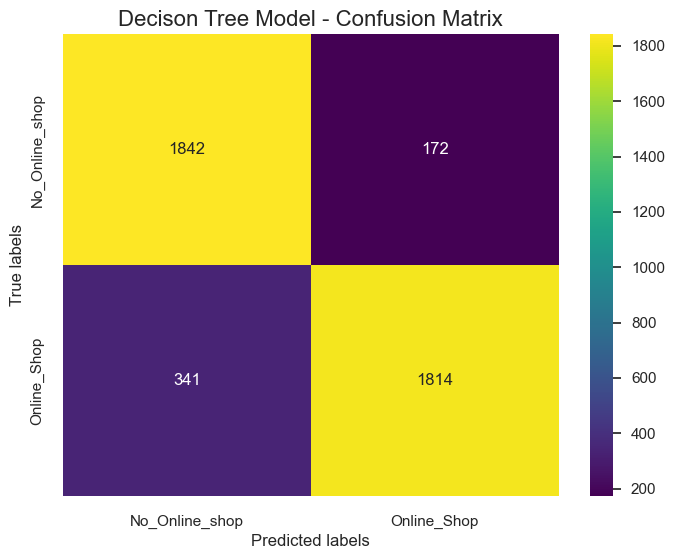

In [73]:
# Confusion matrix for the best model result dtree with default hyperparameters
labels = ['No_Online_shop', 'Online_Shop']
cm = confusion_matrix(y_test, predictions_dtree)

plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='viridis', fmt='g')

ax.set_xlabel('Predicted labels',fontsize=12)
ax.set_ylabel('True labels',fontsize=12)
ax.set_title('Decison Tree Model - Confusion Matrix',fontsize=16)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels);

### 5.1.5 Plotting Decision Tree

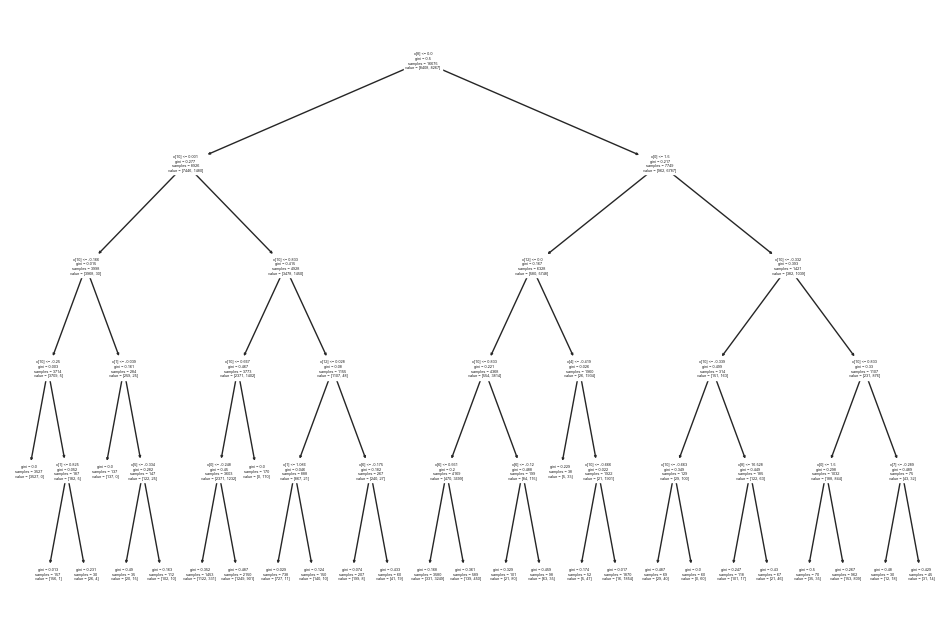

In [75]:
# Display the tree by calling a method plot_tree()
plt.figure(figsize = (12, 8))
tree.plot_tree(dtree_best);

### 5.1.6 Reduce the max_depth to improve the tree visualization

In [76]:
# Reduce max_depth to improve visualization
dtree_maxd = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 38,
                                  max_depth=3,
                                  min_samples_leaf=50
                                  )
dtree_maxd.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, random_state=38)

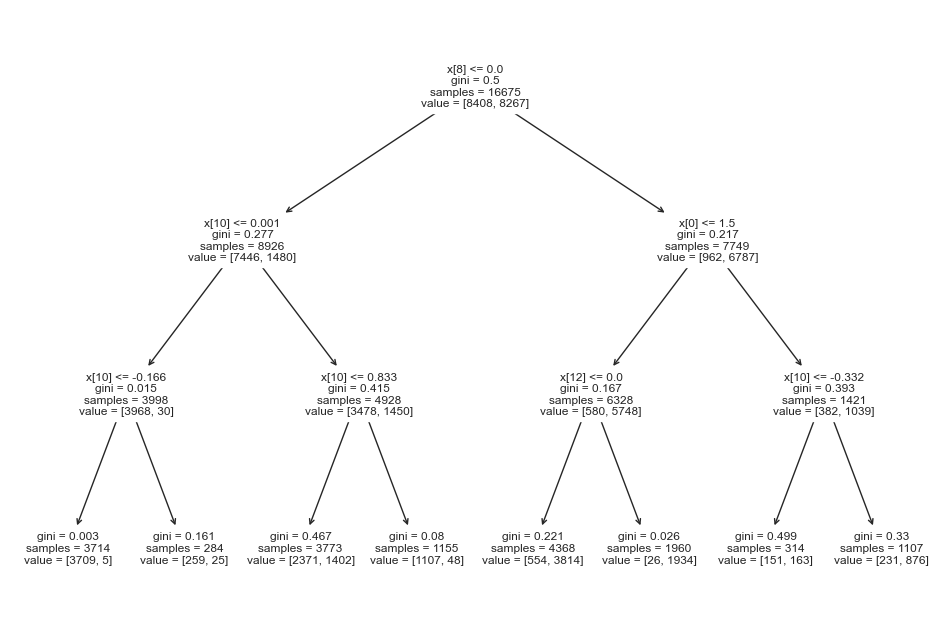

In [77]:
# Display the tree by calling a method plot_tree()
plt.figure(figsize = (12, 8))
tree.plot_tree(dtree_maxd);

## 5.2 Building Support Vector Machine (SVC) Model

### 5.2.1 Apply SCV Model

In [78]:
# Fit the model with default hyperparameters
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [79]:
# Make predictions
predictions_svm = svm.predict(X_test)

In [80]:
# Print classification report
print(classification_report(y_test,predictions_svm))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      2014
           1       0.88      0.72      0.79      2155

    accuracy                           0.80      4169
   macro avg       0.81      0.81      0.80      4169
weighted avg       0.81      0.80      0.80      4169



### 5.2.1.1 Apply Stratified KFold to validate SVM model with default hyperparameters

In [81]:
# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=38)

# Perform cross-validation
cv_results_svm = cross_val_score(svm, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation results
print("Cross-validation results:", cv_results_svm)

Cross-validation results: [0.80515588 0.79856115 0.79736211 0.80935252 0.80455635 0.80263947
 0.81943611 0.78944211 0.82063587 0.78944211]


In [82]:
# Average, minimum and maximum scores
svm_min_score = cv_results_svm.min()
svm_max_score = cv_results_svm.max()
svm_mean_score = cv_results_svm.mean()

# Find the minimum and maximum scores
print(f"The minimum accuracy score is: {svm_min_score} and the maximum accuracy score is: {svm_max_score} across {n_folds} folds.")
print(f"The average accuracy score is: {svm_mean_score}.")

The minimum accuracy score is: 0.7894421115776845 and the maximum accuracy score is: 0.8206358728254349 across 10 folds.
The average accuracy score is: 0.8036583690456153.


### 5.2.2 Find Optimal Hyperparameters using GridSearchCV

In [83]:
# Create the parameter grid based on the results of random search
param_grid = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

# specify model
svm = SVC(kernel = "rbf")   # tested 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

n_folds = 10
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=38)

# Instantiate the GridSearchCV model
svm_gridsearchcv = GridSearchCV(estimator = svm, param_grid = param_grid,
                          cv = n_folds, n_jobs = -1, verbose = 1) 

In [84]:
# Fit the GridSearchCV to the data
svm_gridsearchcv.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             verbose=1)

In [85]:
# GridSearchCV results
svm_results = pd.DataFrame(svm_gridsearchcv.cv_results_)

svm_results_display = svm_results[['rank_test_score','mean_test_score',
                                   'param_C','param_gamma']].sort_values('rank_test_score')
svm_results_display

,rank_test_score,mean_test_score,param_C,param_gamma
9,1,0.892174,1000,0.01
6,2,0.876282,100,0.01
3,3,0.866266,10,0.01
10,4,0.863267,1000,0.001
7,5,0.855831,100,0.001
0,6,0.850613,1,0.01
4,7,0.844376,10,0.001
11,8,0.838739,1000,0.0001
1,9,0.832022,1,0.001
8,10,0.830943,100,0.0001


In [86]:
# print the optimal accuracy score and hyperparameters
print(f"The best accuracy we can get accuracy of {svm_gridsearchcv.best_estimator_}")

The best accuracy we can get accuracy of SVC(C=1000, gamma=0.01)


In [87]:
svm_results_scores = svm_results[['rank_test_score','mean_test_score','split0_test_score','split1_test_score','split2_test_score','split3_test_score',
                       'split4_test_score','split5_test_score','split6_test_score','split7_test_score',
                       'split8_test_score','split9_test_score',]].sort_values('rank_test_score').head(1)
svm_results_scores

,rank_test_score,mean_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
9,1,0.892174,0.897482,0.898681,0.899281,0.88789,0.877698,0.90162,0.897421,0.891422,0.884823,0.885423


In [88]:
# Average, minimum and maximum scores
min_max = svm_results_scores.iloc[:,2:].melt()
svm_min_score = min_max.value.min()
svm_max_score = min_max.value.max()
svm_mean_score = min_max.value.mean()

# Find the minimum and maximum scores
print(f"The minimum accuracy score is: {svm_min_score} and the maximum accuracy score is: {svm_max_score} across {n_folds} folds.")
print(f"The average accuracy score is: {svm_mean_score}.")

The minimum accuracy score is: 0.8776978417266187 and the maximum accuracy score is: 0.901619676064787 across 10 folds.
The average accuracy score is: 0.8921739033488265.


### 5.2.3 Apply SVM Model with best Hyperparameters obtained from GridSearchCV.

In [89]:
# Fit the model with optimal hyperparameters
svm_best = SVC(C=1000, gamma=0.01, kernel="rbf")

svm_best.fit(X_train, y_train)

# Accuracy score
print(f"The best accuracy using Ranfom Forest Classifier Model and GridSearchCV Tunning: {svm_best.score(X_test,y_test)}.")

The best accuracy using Ranfom Forest Classifier Model and GridSearchCV Tunning: 0.8982969537059247.


### 5.2.4 Evaluation SVM Model

In [90]:
# Make predictions
predictions_svm = svm_best.predict(X_test)

# Print classification report
print(classification_report(y_test,predictions_svm))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2014
           1       0.91      0.89      0.90      2155

    accuracy                           0.90      4169
   macro avg       0.90      0.90      0.90      4169
weighted avg       0.90      0.90      0.90      4169



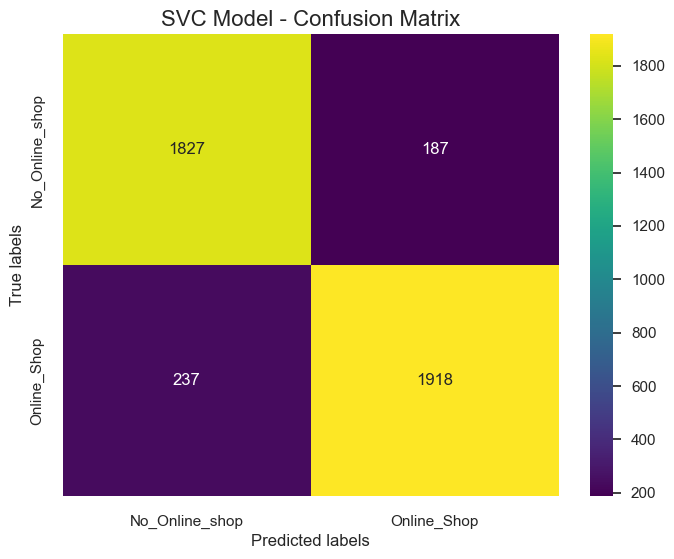

In [91]:
# Confusion matrix
labels = ['No_Online_shop', 'Online_Shop']
cm = confusion_matrix(y_test, predictions_svm)

plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='viridis', fmt='g')

ax.set_xlabel('Predicted labels',fontsize=12)
ax.set_ylabel('True labels',fontsize=12)
ax.set_title('SVC Model - Confusion Matrix',fontsize=16)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels);

## 5.3 Building Random Forest Model

### 5.3.1 Apply Random Forest Model

In [92]:
# Fit the model with default hyperparameters
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
# Make predictions
predictions_rfc = rfc.predict(X_test)

In [94]:
# Print classification report
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2014
           1       0.93      0.95      0.94      2155

    accuracy                           0.94      4169
   macro avg       0.94      0.94      0.94      4169
weighted avg       0.94      0.94      0.94      4169



### 5.3.1.1 Apply Stratified KFold to validate RFC model with default hyperparameters

In [95]:
# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=38)

# Perform cross-validation
cv_results_rfc = cross_val_score(rfc, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation results
print("Cross-validation results:", cv_results_rfc)

Cross-validation results: [0.941247   0.92565947 0.92505995 0.93165468 0.93764988 0.92681464
 0.93341332 0.92861428 0.93881224 0.93941212]


In [96]:
# Average, minimum and maximum scores
rfc_min_score = cv_results_rfc.min()
rfc_max_score = cv_results_rfc.max()
rfc_mean_score = cv_results_rfc.mean()

# Find the minimum and maximum scores
print(f"The minimum accuracy score is: {rfc_min_score} and the maximum accuracy score is: {rfc_max_score} across {n_folds} folds.")
print(f"The average accuracy score is: {rfc_mean_score}.")

The minimum accuracy score is: 0.9250599520383693 and the maximum accuracy score is: 0.9412470023980816 across 10 folds.
The average accuracy score is: 0.9328337569896092.


### 5.3.2 Find Optimal Hyperparameters using GridSearchCV

In [97]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(1, 5, 10),
    'min_samples_split': range(2, 5, 10),
    'n_estimators': [50, 100, 200],
    'max_features': [5, 10]
}

n_folds = 10
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=38)

# Instantiate the GridSearchCV model
rfc_gridsearchcv = GridSearchCV(estimator = rfc, param_grid = param_grid,
                          cv = n_folds, n_jobs = -1, verbose = 1) 

In [98]:
# Fit the GridSearchCV to the data
rfc_gridsearchcv.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(1, 5, 10),
                         'min_samples_split': range(2, 5, 10),
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [99]:
# GridSearchCV results
rfc_results = pd.DataFrame(rfc_gridsearchcv.cv_results_)
rfc_results_display = rfc_results[['rank_test_score','mean_test_score','param_max_depth',
                           'param_min_samples_leaf','param_min_samples_split','param_n_estimators',
                           'param_max_features']].sort_values('rank_test_score')
rfc_results_display

,rank_test_score,mean_test_score,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,param_max_features
17,1,0.910464,10,1,2,200,10
13,2,0.909324,10,1,2,100,5
14,3,0.909264,10,1,2,200,5
16,4,0.909144,10,1,2,100,10
15,5,0.909024,10,1,2,50,10
12,6,0.908484,10,1,2,50,5
11,7,0.895531,8,1,2,200,10
9,8,0.895411,8,1,2,50,10
6,9,0.895110,8,1,2,50,5
10,10,0.894931,8,1,2,100,10


In [100]:
# print the optimal accuracy score and hyperparameters
print(f"The best accuracy we can get accuracy of {rfc_gridsearchcv.best_estimator_}")

The best accuracy we can get accuracy of RandomForestClassifier(max_depth=10, max_features=10, n_estimators=200)


In [101]:
rfc_results_scores = rfc_results[['rank_test_score','mean_test_score','split0_test_score','split1_test_score','split2_test_score','split3_test_score',
                       'split4_test_score','split5_test_score','split6_test_score','split7_test_score',
                       'split8_test_score','split9_test_score',]].sort_values('rank_test_score').head(1)
rfc_results_scores

,rank_test_score,mean_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
17,1,0.910464,0.919664,0.91307,0.914269,0.916667,0.908273,0.910618,0.904619,0.911218,0.907019,0.89922


In [102]:
# Average, minimum and maximum scores
min_max = rfc_results_scores.iloc[:,2:].melt()
rfc_min_score = min_max.value.min()
rfc_max_score = min_max.value.max()
rfc_mean_score = min_max.value.mean()

# Find the minimum and maximum scores
print(f"The minimum accuracy score is: {rfc_min_score} and the maximum accuracy score is: {rfc_max_score} across {n_folds} folds.")
print(f"The average accuracy score is: {rfc_mean_score}.")

The minimum accuracy score is: 0.8992201559688062 and the maximum accuracy score is: 0.919664268585132 across 10 folds.
The average accuracy score is: 0.9104635907350904.


### 5.3.3 Apply Random Forest Model with best Hyperparameters obtained from GridSearchCV.

In [103]:
# Fit the model with optimal hyperparameters
rfc_best = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=1,
                             min_samples_split=2,
                             max_features= 10,
                             n_estimators=200)
rfc_best.fit(X_train,y_train)

# Accuracy score
print(f"The best accuracy using Ranfom Forest Classifier Model and GridSearchCV Tunning: {rfc_best.score(X_test,y_test)}.")

The best accuracy using Ranfom Forest Classifier Model and GridSearchCV Tunning: 0.9165267450227872.


### 5.3.4 Evaluation Random Forest Classifier Final Model

### The best results found are the Random Forest with default hyperparameters!

In [104]:
# Make predictions
predictions_rfc = rfc.predict(X_test)

In [105]:
# Print classification report
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2014
           1       0.93      0.95      0.94      2155

    accuracy                           0.94      4169
   macro avg       0.94      0.94      0.94      4169
weighted avg       0.94      0.94      0.94      4169



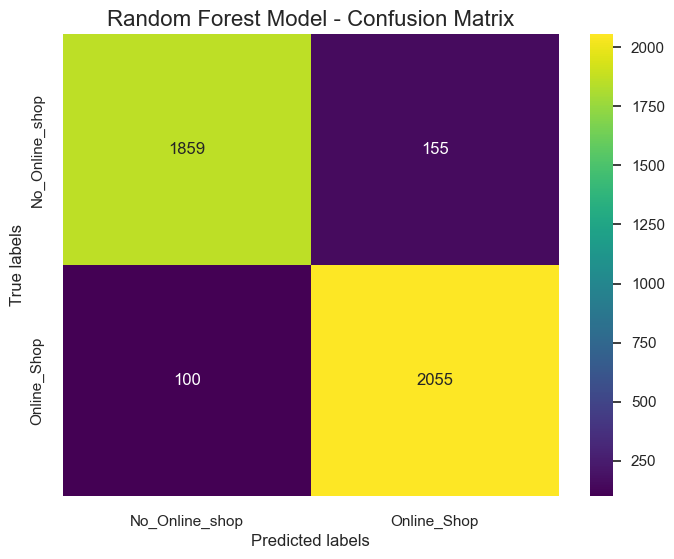

In [106]:
# Confusion matrix
labels = ['No_Online_shop', 'Online_Shop']
cm = confusion_matrix(y_test, predictions_rfc)

plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='viridis', fmt='g')

ax.set_xlabel('Predicted labels',fontsize=12)
ax.set_ylabel('True labels',fontsize=12)
ax.set_title('Random Forest Model - Confusion Matrix',fontsize=16)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels);

# 6. Feature Importances

In [107]:
columns_names = ['adm', 'adm_dur', 'inf', 'inf_dur', 'prod_rel', 'prod_rel_dur',
       'bounces', 'exit', 'pg_val', 's_day', 'month', 'browser', 'visitor', 'kend']

In [108]:
# Feature importances
feature_importance = rfc_best.feature_importances_
feature_importance_dict = dict(zip(columns_names, feature_importance))

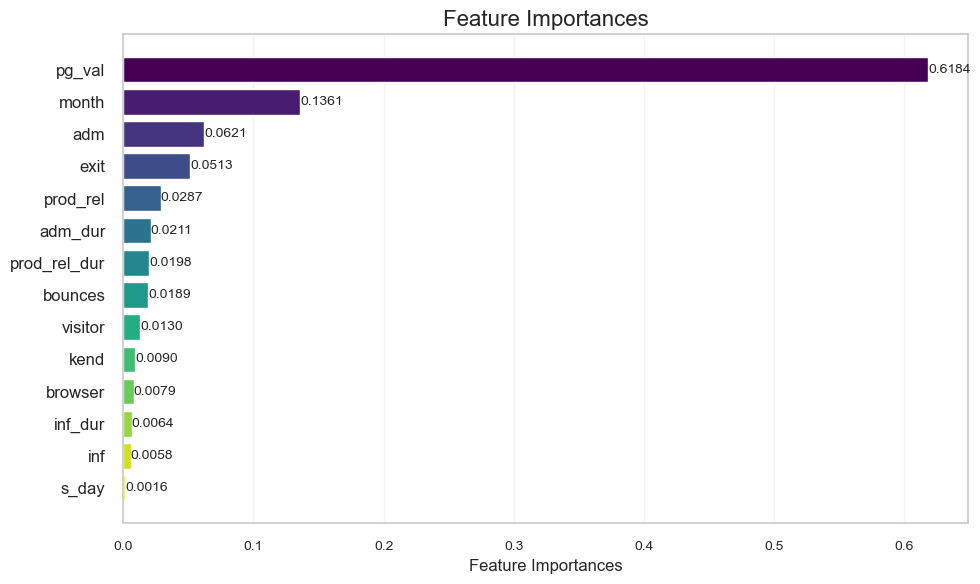

In [109]:
# Plot Feature importances
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
features, importances = zip(*sorted_feature_importance)

viridis_colors = plt.cm.viridis(np.linspace(0, 1, len(importances)))
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color=viridis_colors)
plt.xlabel('Feature Importances', fontsize=12)
plt.title('Feature Importances', fontsize=16)
plt.gca().invert_yaxis()  
plt.yticks(fontsize=12)
plt.xticks(fontsize=10)

for index, value in enumerate(importances):
    plt.text(value, index, f'{value:.4f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.grid(axis='x', alpha=0.2)
plt.grid(axis='y', linestyle='') 
plt.show()

# 7. SHapley Additive exPlanations (Shap)

In [110]:
# Calculate SHAP values on the test set
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

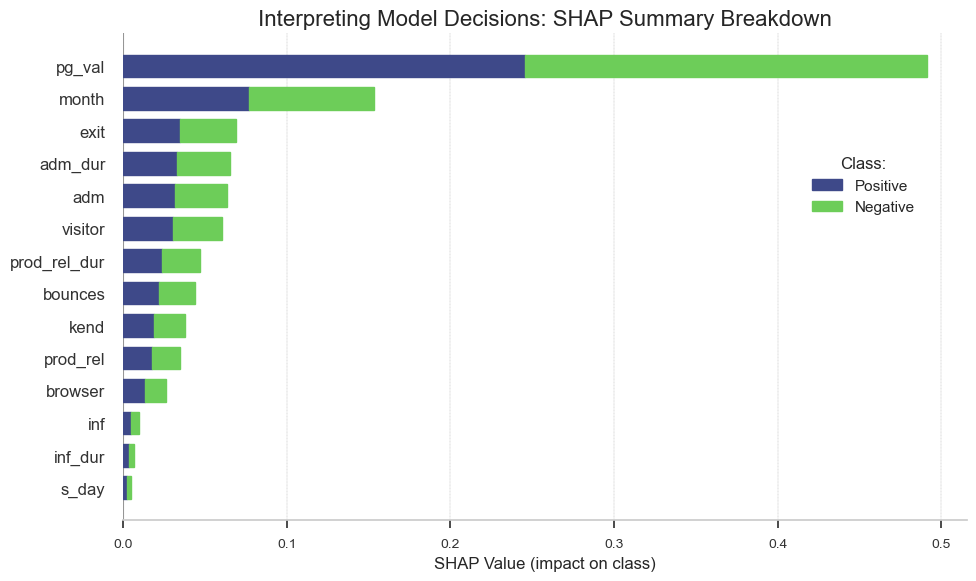

In [111]:
# Create the summary plot with default colors for both classes
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=columns_names, class_names=["Negative", "Positive"], show=False)

plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(10, 6)
custom_colors = ['#3E4989', '#6DCD59']  

# Retrieve the bar plot and modify the colors for each class
bars = plt.gcf().get_axes()[0].patches

# Iterate through the bars and set the custom colors for each class
for i, bar in enumerate(bars):
    if i < len(bars) // 2: 
        bar.set_color(custom_colors[0])
    else:  
        bar.set_color(custom_colors[1])

plt.xlabel("SHAP Value (impact on class)", fontsize=12)
plt.title("Interpreting Model Decisions: SHAP Summary Breakdown", fontsize=16)
plt.tight_layout()
plt.yticks(fontsize=12)
plt.xticks(fontsize=10)
plt.legend(loc='lower left', bbox_to_anchor=(0.8, 0.6), title='Class:', title_fontsize='12')
plt.grid(axis='x', linestyle='--', linewidth=0.2, color='gray')
plt.grid(axis='y', linestyle='')
plt.show()

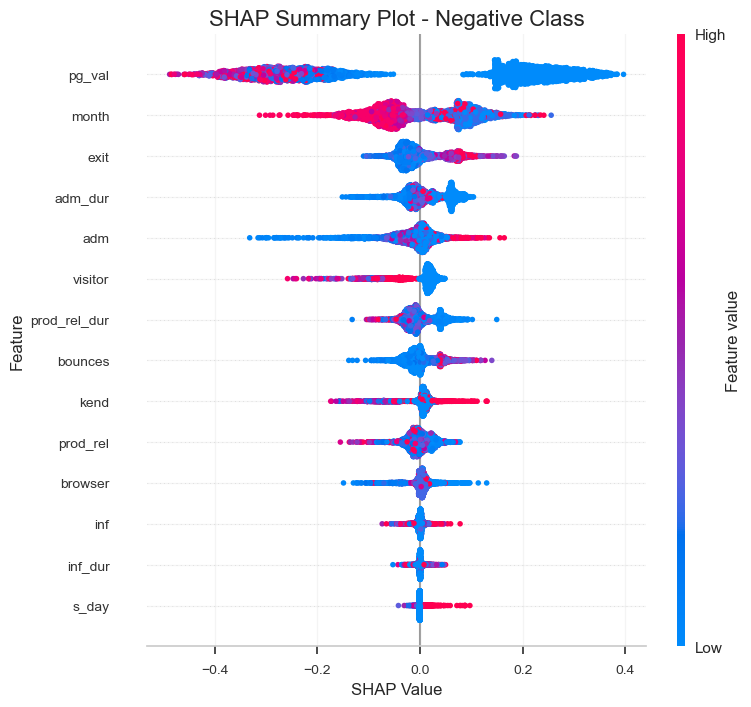

In [112]:
# Create a summary plot 
shap.summary_plot(shap_values[0], X_test, feature_names=columns_names, show=False)

plt.title('SHAP Summary Plot - Negative Class', fontsize=16)
plt.xlabel('SHAP Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.2)
plt.show()

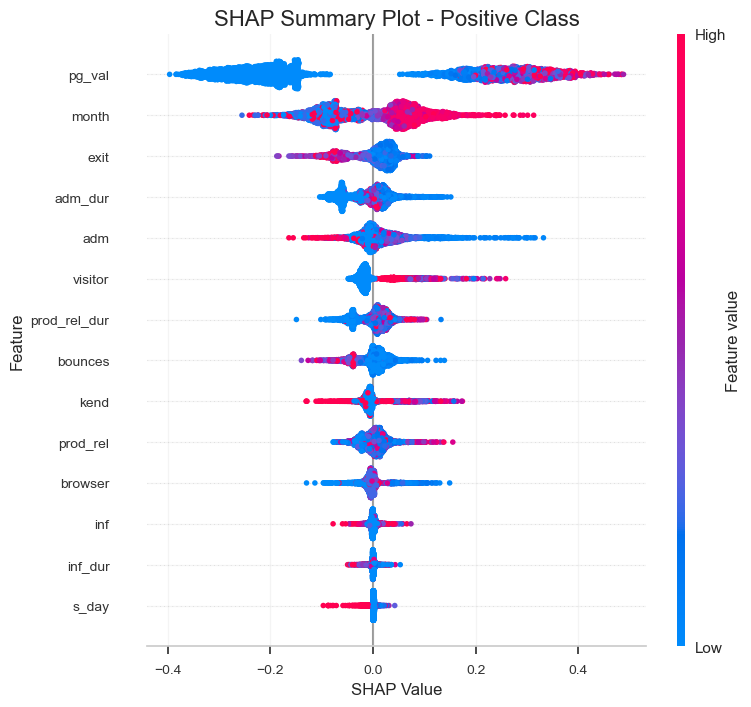

In [113]:
# Create SHAP Summary Plot - Positive Class
shap.summary_plot(shap_values[1], X_test, feature_names=columns_names, show=False)

plt.title('SHAP Summary Plot - Positive Class', fontsize=16)
plt.xlabel('SHAP Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.2)
plt.show()

In [114]:
# Select index for tests
index_for_test = 8

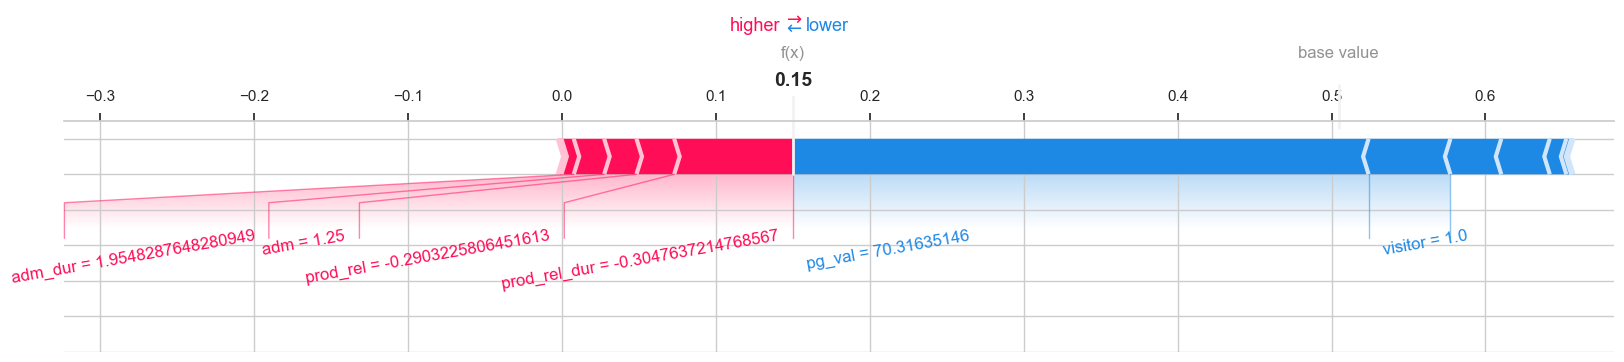

In [115]:
# Use force plot to check the individual prediction Class 0
shap.plots.force(explainer.expected_value[0], shap_values[0][index_for_test, :], X_test[index_for_test, :], matplotlib=True, feature_names=columns_names,
                 text_rotation=10, show=False)

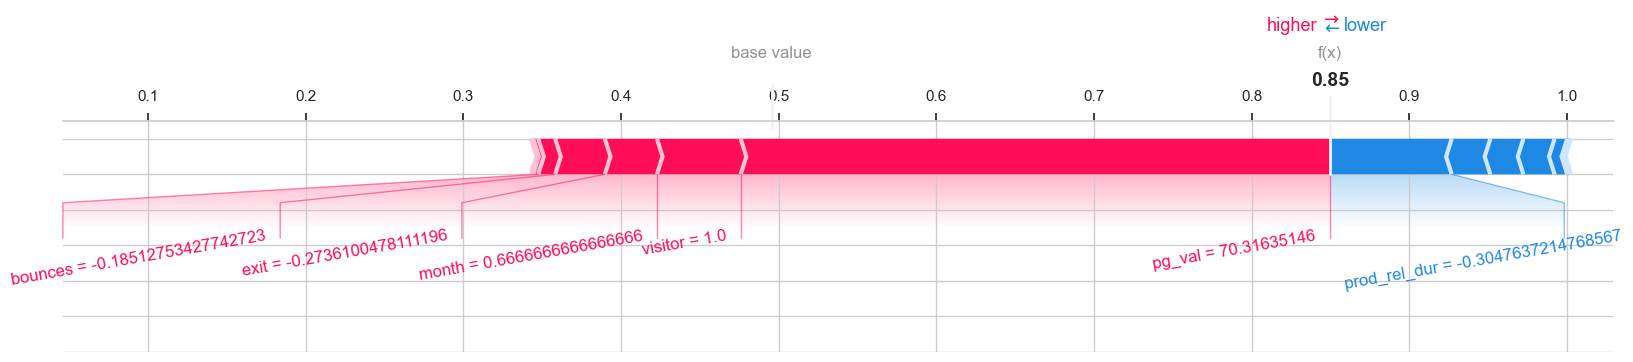

In [116]:
# Use force plot to check the individual prediction Class 1
shap.plots.force(explainer.expected_value[1], shap_values[1][index_for_test, :], X_test[index_for_test, :], matplotlib=True, feature_names=columns_names,
                 text_rotation=10, show=False)

In [117]:
# Check the y_test result to compare with force plot analyse
y_test[index_for_test]

1

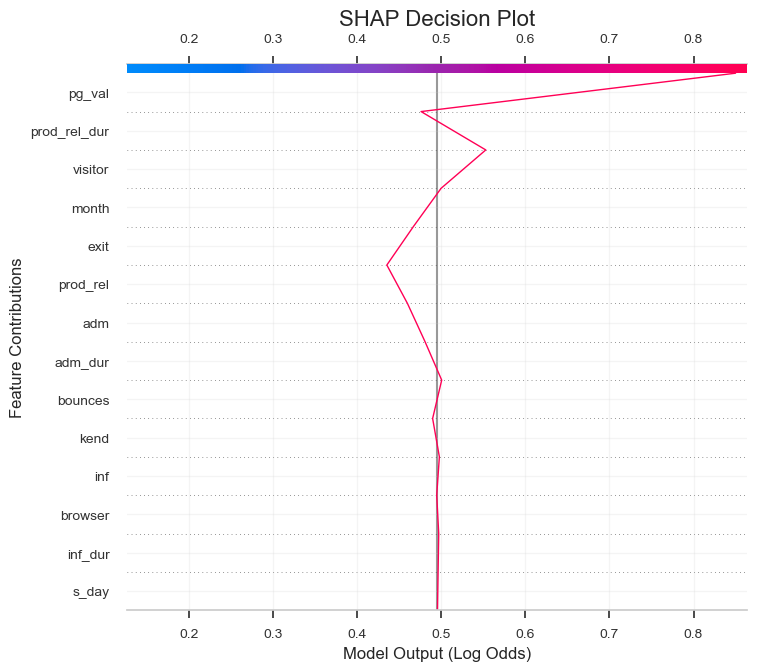

In [119]:
# Create SHAP Decision Plot
shap.decision_plot(explainer.expected_value[1], shap_values[1][index_for_test, :], feature_names=columns_names, show=False)

plt.title('SHAP Decision Plot', fontsize=16)
plt.xlabel('Model Output (Log Odds)', fontsize=12)
plt.ylabel('Feature Contributions', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.2)

plt.show()

### Reference list

- Anguita, D., Ghelardoni, L., Ghio, A., Oneto, L. and Ridella, S. (2012). The ‘K’ in K-fold Cross Validation. [online] https://www.esann.org/: Esann, pp.441–446. Available at: https://www.esann.org/sites/default/files/proceedings/legacy/es2012-62.pdf.
- Awan, A.A. (2023). Using SHAP Values for Model Interpretability in Machine Learning. [online] KDnuggets. Available at: https://www.kdnuggets.com/2023/08/shap-values-model-interpretability-machine-learning.html [Accessed 14 Nov. 2023].
- Bruce, P.C., Bruce, A. and Gedeck, P. (2020). Practical statistics for data scientists: 50+ essential concepts using R and Python. Sebastopol, Ca: O’reilly Media, Inc.
- Daniel, B. (2019). Cross-validation. Research Gate, [online] pp.542–545. Available at: https://www.researchgate.net/profile/Daniel-Berrar/publication/324701535_Cross-Validation/links/5cb4209c92851c8d22ec4349/Cross-Validation.pdf [Accessed 1 May 2023].
- Hashmi, F. (2020). Titanic survival prediction case study in python. [online] Thinking Neuron. Available at: https://thinkingneuron.com/titanic-survival-prediction-case-study-in-python/ [Accessed 1 May 2023].
- Jung, Y. (2017). Multiple predictingK-fold cross-validation for model selection. Journal of Nonparametric Statistics, 30(1), pp.197–215. doi:https://doi.org/10.1080/10485252.2017.1404598.
- Kaggle (2021). Online Shoppers Purchasing Intention Dataset. [online] www.kaggle.com. Available at: https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset [Accessed 28 Apr. 2023].
- Lantos, D. (2021). How to explain your machine learning model using SHAP? [online] Advancing Analytics. Available at: https://medium.com/advancing-analytics/how-to-explain-your-machine-learning-model-using-shap-449cf05d5160 [Accessed 14 Nov. 2023].
- Mckinney, W. (2018). Python for data analysis: data wrangling with pandas, NumPy, and IPython. Sebastopol, Ca: O’reilly Media, Inc., October.
- Müller, A.C. and Guido, S. (2017). Introduction to machine learning with Python: a guide for data scientists. Beijing: O’reilly.
- Probst, P., Wright, M.N. and Boulesteix, A. (2019). Hyperparameters and tuning strategies for random forest. Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery, [online] 9(3). doi:https://doi.org/10.1002/widm.1301.
- Sasaki, T. (2021). Clustering and Predict Modeling by PyCaret. [online] kaggle.com. Available at: https://www.kaggle.com/code/sasakitetsuya/clustering-and-predict-modeling-by-pycaret [Accessed 14 Nov. 2023].
- Sharma, P. (2019). The Ultimate Guide to K-Means Clustering: Definition, Methods and Applications. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/#How_to_Apply_K-Means_Clustering_Algorithm? [Accessed 1 Nov. 2023].
- Trevisan, V. (2022). Using SHAP Values to Explain How Your Machine Learning Model Works. [online] Medium. Available at: https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137.
- Weerts, H.J.P., Mueller, A.C. and Vanschoren, J. (2020). Importance of Tuning Hyperparameters of Machine Learning Algorithms. arXiv:2007.07588 [cs, stat]. [online] Available at: https://arxiv.org/abs/2007.07588 [Accessed 5 Nov. 2023].
- Wikipedia Contributors (2019). Cluster Analysis. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Cluster_analysis [Accessed 1 Nov. 2023].
